In [ ]:
import numpy as np #
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import  train_test_split,KFold,StratifiedKFold,cross_val_score,LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/bank_with_missing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,NaN,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
df.shape

(36201, 17)

In [ ]:
df.isnull().sum()

,0
age,81
job,92
marital,0
education,0
default,1
balance,62
housing,1
loan,1
contact,1
day,1


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36196,37.0,services,married,secondary,no,321.0,yes,no,cellular,11.0,may,222.0,2.0,300.0,2.0,failure,no
36197,52.0,services,divorced,secondary,no,43.0,yes,yes,cellular,11.0,may,131.0,2.0,-1.0,0.0,unknown,no
36198,38.0,admin.,single,secondary,no,3049.0,yes,yes,cellular,11.0,may,225.0,1.0,347.0,1.0,failure,no
36199,50.0,blue-collar,married,secondary,no,372.0,yes,no,telephone,11.0,may,21.0,1.0,-1.0,0.0,unknown,no
36200,44.0,services,divorced,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mean_val=df['age'].mean()
df['age'].fillna(mean_val, inplace=True)
#for data in normal distribution take mean
#for data in outliers take median

In [ ]:
mode_val=df['job'].mode()[0]
df['job'].fillna(mode_val, inplace=True)
#for data in category take mode

In [ ]:
df.dropna(subset=['balance'],inplace=True)

In [ ]:
df.shape

(36139, 17)

In [ ]:
df['y'].value_counts()

,count
y,
no,33707
yes,2432


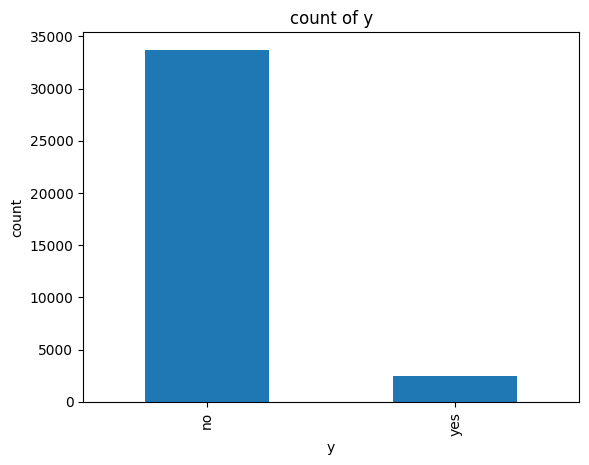

In [ ]:
df['y'].value_counts().plot(kind='bar')
plt.title('count of y')
plt.xlabel('y')
plt.ylabel('count')
plt.show()

In [ ]:
le=LabelEncoder()
df['y']=le.fit_transform(df['y'])

In [ ]:
x_raw=df.drop(columns=['y'])
y=df['y']
x=pd.get_dummies(x_raw,drop_first=True).astype(int)
#drop first is used coz dummies me new columns bante h, hume ab old columns nhi chaiye

In [ ]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,40,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
df.shape

(36139, 17)

In [ ]:
x.shape

(36139, 41)

In [ ]:
#x = df.drop('y',axis=1)
#y = df['y']

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler =StandardScaler()
x_trains=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
classifier = LogisticRegression(max_iter=100, random_state=42)
classifier.fit(x_trains, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_test_pred=classifier.predict(x_test)

In [ ]:
y_test_prob=classifier.predict_proba(x_test)[:,1]

In [ ]:
accuracy_score(y_test,y_test_pred)

0.9382032835270245

In [ ]:
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10112
           1       0.58      0.30      0.40       730

    accuracy                           0.94     10842
   macro avg       0.77      0.64      0.68     10842
weighted avg       0.93      0.94      0.93     10842



In [ ]:
t=DecisionTreeClassifier(max_depth=5, random_state=42)
t.fit(x_trains,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_t=t.predict(x_test)
y_prod_t=t.predict_proba(x_test)[:,1]

In [ ]:
#y_pred_t[0:1000]

In [ ]:
accuracy_score(y_test,y_pred_t)

0.9379265818114739

In [ ]:
cr=classification_report(y_test,y_pred_t)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10112
           1       0.56      0.39      0.46       730

    accuracy                           0.94     10842
   macro avg       0.76      0.68      0.71     10842
weighted avg       0.93      0.94      0.93     10842



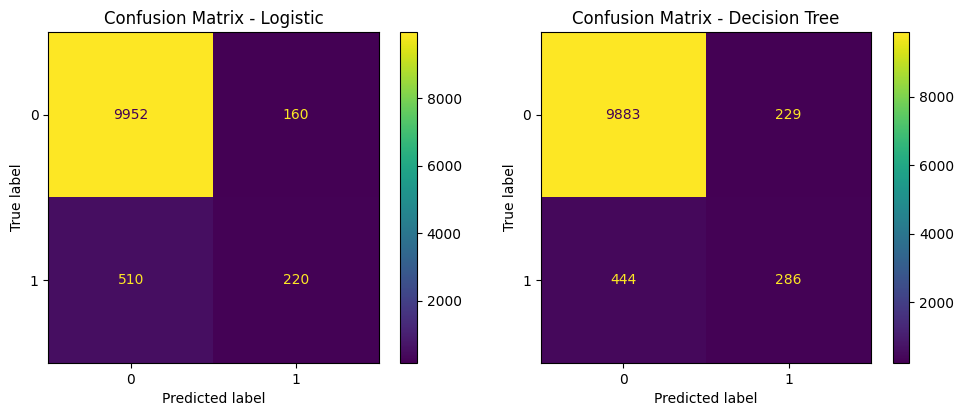

In [ ]:
#Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[0])

axs[0].set_title("Confusion Matrix - Logistic")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_t, ax=axs[1])

axs[1].set_title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

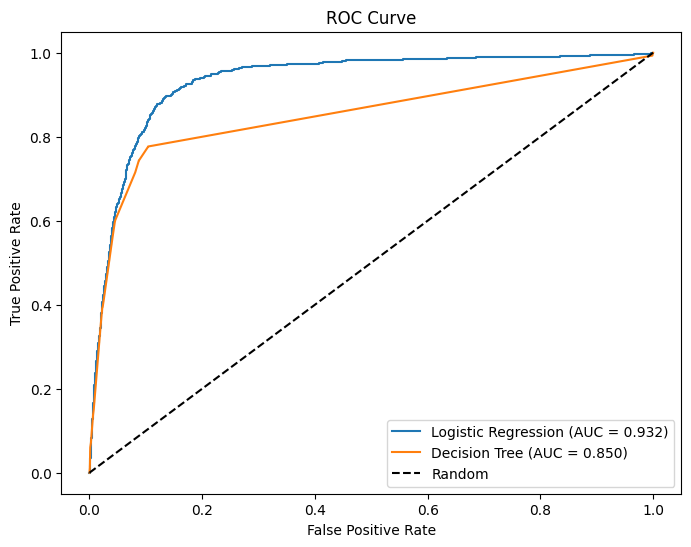

In [ ]:
# ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_prob)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prod_t)
auc_log = roc_auc_score(y_test, y_test_prob)
auc_tree = roc_auc_score(y_test, y_prod_t)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()